# Środowisko **MountainCar**

**Pojazd** znajduje się na **jednowymiarowym torze** (**patrz rysunek poniżej**), umieszczonym pomiędzy dwoma wzniesieniami. **Celem jest wjechanie pojazdu na górę po prawej stronie** (miejsce oznaczone chorągiewką). Silnik samochodu nie jest wystarczająco mocny, aby bezpośrednio wjechać na górę. **Możliwym rozwiązaniem jest jazda "tam iz powrotem", w lewo i prawo i nabranie rozpędu**. 

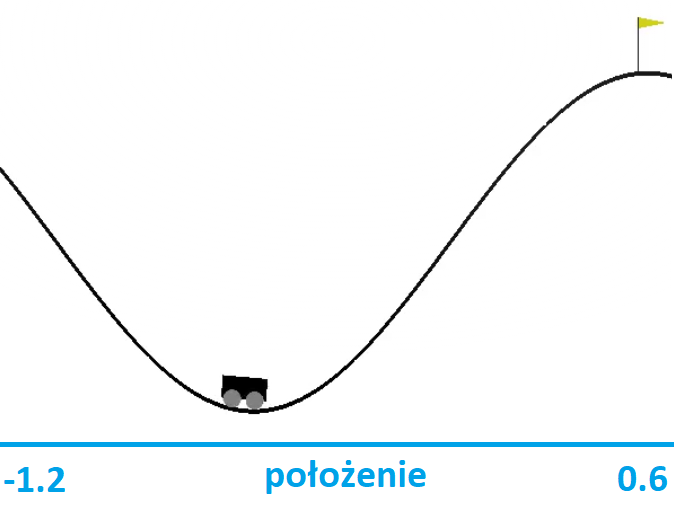

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

**Stan** reprezentowany jest za pomocą wektora **[położenie,prędkość]**. **Stan początkowy** ma losowe **położenie od -0,6 do -0,4** (położenie w dolinie) i **prędkość=0**:

In [2]:
env = gym.make("MountainCar-v0")
State_0 = env.reset()
State_0

array([-0.50000892,  0.        ])

Wartości **min** i **max** położenia oraz prędkości:

In [3]:
print("położenie min=",env.observation_space.low[0]," max=",env.observation_space.high[0])
print("prędkość min=",env.observation_space.low[1]," max=",env.observation_space.high[1])

położenie min= -1.2  max= 0.6
prędkość min= -0.07  max= 0.07


In [4]:
model = Sequential()
model.add(Dense(units = 20, input_dim=2, activation='relu'))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dense(units = 3, activation = "linear"))

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


# Akcje

Możliwe do wykonania są **3 akcje**, oznaczone **0,1,2**:

In [6]:
env.action_space

Discrete(3)

Przetestujmy **akcję 0** - wykonajmy ją **10 razy**:

In [7]:
env.reset()
for _ in range(10):
    action = 0
    obs, reward, done, info = env.step(action)
    print("stan=",obs)

stan= [-0.47345975 -0.00138489]
stan= [-0.47621927 -0.00275952]
stan= [-0.48033294 -0.00411367]
stan= [-0.48577019 -0.00543725]
stan= [-0.49249055 -0.00672036]
stan= [-0.50044388 -0.00795333]
stan= [-0.50957074 -0.00912685]
stan= [-0.51980277 -0.01023203]
stan= [-0.53106327 -0.0112605 ]
stan= [-0.5432678  -0.01220452]


Jak widać powyżej akcja 0 powoduje **pchnięcie pojazdu w lewą stronę** (zmniejszeniu ulega pierwsza współrzędna) i **zwiększeniu ulega prędkość pojazdu w lewą stronę** (druga współrzędna - ujemna wartość prędkości).

W przypadku pozostałych akcji: **1 - brak pchnięcia pojazdu**, **2 - popchnięcie w prawo**.

Przetestujmy działanie środowiska - **wykonajmy pewną ilość (dokładnie 50) akcji 0** (pchnięcie pojazdu w lewą stronę):

In [8]:
env.reset()
for _ in range(50):
    action = 0
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.48711680409630675  prędkość:  -0.0012826289836551643
pojazd porusza się w LEWO
położenie:  -0.4896725019483575  prędkość:  -0.002555697852050722
pojazd porusza się w LEWO
położenie:  -0.49348220778046115  prędkość:  -0.0038097058321036634
pojazd porusza się w LEWO
położenie:  -0.4985174806920784  prędkość:  -0.0050352729116172786
pojazd porusza się w LEWO
położenie:  -0.5047406858640864  prędkość:  -0.006223205172008001
pojazd porusza się w LEWO
położenie:  -0.5121052512735417  prędkość:  -0.007364565409455263
pojazd porusza się w LEWO
położenie:  -0.5205560010354917  prędkość:  -0.008450749761950049
pojazd porusza się w LEWO
położenie:  -0.5300295712897353  prędkość:  -0.009473570254243516
pojazd porusza się w LEWO
położenie:  -0.5404549135681345  prędkość:  -0.010425342278399207
pojazd porusza się w LEWO
położenie:  -0.551753888684768  prędkość:  -0.011298975116633591
pojazd porusza się w LEWO
położenie:  -0.5638419514507717  prędkość:  -0.012088062766003606
pojazd por

Jak widać powyżej pojazd **początkowo porusza się w lewo**, ale **po pewnym czasie zaczyna opadać, czyli poruszać się w prawo**. W tym momencie prędkość pojazdu zmienia wartość z ujemnej (prędkość w lewo) na dodatnią (prędkość w prawo). 

Zobaczmy co się dzieje dalej. Spróbujmy wykonać teraz pewną ilość razy **akcję 1 czyli brak pchnięcia** (UWAGA: **nie resetujemy stanu środowiska!!!**):

In [9]:
for _ in range(50):
    action = 1
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.7687445739932356  prędkość:  0.012681651373880673
pojazd porusza się w PRAWO
położenie:  -0.7543856437076537  prędkość:  0.014358930285581929
pojazd porusza się w PRAWO
położenie:  -0.7384308233878812  prędkość:  0.015954820319772488
pojazd porusza się w PRAWO
położenie:  -0.7209740137418565  prędkość:  0.017456809646024727
pojazd porusza się w PRAWO
położenie:  -0.7021218888279019  prędkość:  0.01885212491395458
pojazd porusza się w PRAWO
położenie:  -0.6819939370593373  prędkość:  0.020127951768564644
pojazd porusza się w PRAWO
położenie:  -0.6607222268177161  prędkość:  0.021271710241621267
pojazd porusza się w PRAWO
położenie:  -0.6384508522431006  prędkość:  0.022271374574615425
pojazd porusza się w PRAWO
położenie:  -0.6153350301113719  prędkość:  0.02311582213172871
pojazd porusza się w PRAWO
położenie:  -0.5915398383538236  prędkość:  0.0237951917575483
pojazd porusza się w PRAWO
położenie:  -0.5672386094743809  prędkość:  0.02430122887944272
pojazd porusza się w

Po zmianach położenia widać, że **pojazd początkowo kontynuuje ruch w prawo** (wartość położenia ulega zwiększeniu) czyli **podjeżdża pod wzniesienie z prawej strony**. Po pewnym czasie jednak **prędkość zmienia wartość z dodatniej na ujemną** co oznacza, że **pojazd zaczyna opadać czyli porusza się w lewo**.  

# Nagrody

Nagroda wynosi **-1 za każdy krok czasowy**, aż do osiągnięcia **docelowej pozycji 0.5** (położenie chorągiewki). 

# Zakończenie epizodu

Zakończenie epizodu następuje w chwili **osiągnięcia położenia 0.5** lub **po przejściu 200 kroków**.

Przetestujmy działanie środowiska w przypadku **losowego wyboru akcji** (`action = env.action_space.sample()`).

In [10]:
R = 0
env.reset()
for e in range(300):
    #env.render()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("Epizod=",e," akcja=",action," R=",reward," koniec epizodu?=",done," stan=",obs)

Epizod= 0  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.41587193 -0.00079964]
Epizod= 1  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.41646553 -0.0005936 ]
Epizod= 2  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.41884887 -0.00238334]
Epizod= 3  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.42100497 -0.0021561 ]
Epizod= 4  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.42391843 -0.00291346]
Epizod= 5  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.42856841 -0.00464997]
Epizod= 6  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.43292149 -0.00435308]
Epizod= 7  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.4379463  -0.00502481]
Epizod= 8  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.44360645 -0.00566015]
Epizod= 9  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.45086081 -0.00725436]
Epizod= 10  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.45765638 -0.00679557]
Epizod= 11  akcja= 1  R= -1.0  koniec epizodu?= False

Jak widać **po 200 krokach następuje zakończenie epizodu**.

# Rozwiązanie **zadania 1** z zestawu 11

In [11]:
train_episodes = 100
epsilon = 1
gamma = 0.99
max_steps = 50
max_right = -1.2

In [14]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):

  epsilon = epsilon-(1/train_episodes)
  max_right = -1.2
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 2])  
  
  done = False
  while t < max_steps and done == False:  

    Qs = model.predict(state)[0]

    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)

    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 2])
    total_reward += reward

    if  max_right<next_state[0][0]:
      max_right = next_state[0][0]

    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])
    Q_target = model.predict(state)
    Q_target[0][action] = y
          
    h = model.fit(state,Q_target,epochs=1,verbose=0)

    loss = h.history['loss'][0]

    state = next_state
    t=t+1
  
  print(e," Max right=",max_right," Loss=",loss)
  Rewards.append(max_right)
  Loss.append(loss)

1  Max right= -0.38436239896987906  Loss= 0.15188275277614594
2  Max right= -0.41398681623889355  Loss= 0.03190995007753372
3  Max right= -0.4456559321105769  Loss= 0.2684228718280792
4  Max right= -0.3993705323161268  Loss= 0.33269181847572327
5  Max right= -0.41945402863579623  Loss= 0.0001998363295570016
6  Max right= -0.42480235618123086  Loss= 0.25723913311958313
7  Max right= -0.4022610705846165  Loss= 0.14077429473400116
8  Max right= -0.45708397294380537  Loss= 0.001106946379877627
9  Max right= -0.4114788640246655  Loss= 0.26213571429252625
10  Max right= -0.4382218684150334  Loss= 0.1944866180419922
11  Max right= -0.49152427662071757  Loss= 0.15333296358585358
12  Max right= -0.48924071064977664  Loss= 0.0025664339773356915
13  Max right= -0.4544849324105588  Loss= 6.622588989557698e-05
14  Max right= -0.5019070207599945  Loss= 0.043277084827423096
15  Max right= -0.4336716336318002  Loss= 0.009971532970666885
16  Max right= -0.4631169016106191  Loss= 0.03353371098637581
17 

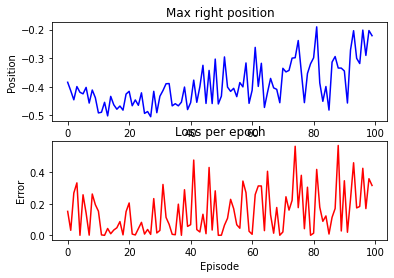

In [15]:
plt.subplot(211)
plt.ylabel('Position')  
plt.title('Max right position')
plt.plot(list(range(train_episodes)),Rewards,"b")

plt.subplot(212)
plt.xlabel('Episode')
plt.ylabel('Error')  
plt.title('Loss per epoch')
plt.plot(list(range(train_episodes)),Loss,"r")

plt.show()

In [ ]:
#DO UZUPEŁNIENIA